In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Load your data
factors = pd.read_csv('CleanedData.csv')  # replace with your actual csv file
policy_rate = pd.read_csv('AveragePolicyRate.csv')  # replace with your actual csv file

In [30]:
factors.head()

,Year,GDP,Inflation,Unemployment
0,2003,5.200000,29.772980,7.736
1,2004,5.600000,18.042739,6.757
2,2005,5.900004,15.438992,5.814
3,2006,6.399913,11.679184,4.900
4,2007,4.346819,10.734267,5.121


In [31]:
policy_rate.head()

,Year,Average Policy Rate
0,2003,25.333333
1,2004,18.875000
2,2005,16.333333
3,2006,14.166667
4,2007,12.750000


In [35]:
data = pd.merge(factors, policy_rate, on='Year', how='inner')
data.to_csv('MergedData.csv', index=False)

In [36]:
data.head()

,Year,GDP,Inflation,Unemployment,Average Policy Rate
0,2003,5.200000,29.772980,7.736,25.333333
1,2004,5.600000,18.042739,6.757,18.875000
2,2005,5.900004,15.438992,5.814,16.333333
3,2006,6.399913,11.679184,4.900,14.166667
4,2007,4.346819,10.734267,5.121,12.750000


In [58]:
# set year compoenent as index
data.set_index('Year', inplace=True)

# convert data to time series
data.index = pd.to_datetime(data.index, format='%Y')



In [59]:
data

,GDP,Inflation,Unemployment,Average Policy Rate
Year,,,,
2003,5.200000,29.772980,7.736,25.333333
2004,5.600000,18.042739,6.757,18.875000
2005,5.900004,15.438992,5.814,16.333333
2006,6.399913,11.679184,4.900,14.166667
2007,4.346819,10.734267,5.121,12.750000
2008,9.149799,16.494640,5.143,15.560000
2009,4.844487,19.246948,5.379,18.400000
2010,7.899712,10.733390,5.380,14.300000
2011,14.047124,8.728459,4.191,12.750000


In [62]:
# Create a trace for each indicator
gdp_trace = go.Scatter(x=data.index, y=data['GDP'], mode='lines', name='GDP')
inflation_trace = go.Scatter(x=data.index, y=data['Inflation'], mode='lines', name='Inflation')
unemployment_trace = go.Scatter(x=data.index, y=data['Unemployment'], mode='lines', name='Unemployment')
policy_rate_trace = go.Scatter(x=data.index, y=data['Average Policy Rate'], mode='lines', name='Average Policy Rate')

# Create a layout
layout = go.Layout(title='GDP, Inflation, and Unemployment over the Years', xaxis=dict(title='Year'), yaxis=dict(title='Value'))

# Create a Figure and add the traces
fig = go.Figure(data=[gdp_trace, inflation_trace, unemployment_trace, policy_rate_trace ], layout=layout)

# Show the figure
fig.show()

In [63]:
# Define predictors and target
predictors = ['GDP', 'Inflation', 'Unemployment'] # replace with your actual predictors
target = 'Average Policy Rate'  # replace with your actual target column


In [64]:
predictors

['GDP', 'Inflation', 'Unemployment']

In [65]:
X = data[predictors]
y = data[target]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [67]:
# decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [68]:
#random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
# Make predictions
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)


In [70]:
dt_mse = mean_squared_error(y_test, dt_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

In [71]:
# print errors  
print(f'Decision Tree MSE: {dt_mse}')
print(f'Random Forest MSE: {rf_mse}')

Decision Tree MSE: 12.405339166666664
Random Forest MSE: 8.913731688378666


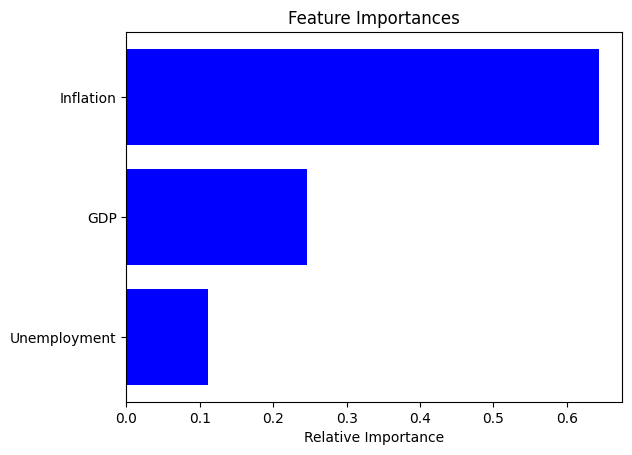

In [73]:
# plot the importance of each feature
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [predictors[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
